<a href="https://colab.research.google.com/github/ishmeetsinghsaini11/magic-telescope-pytorch/blob/main/Magic_Model_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml] .Irvine, CA: University of California, School of
Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [ ]:
pd.read_csv('magic04.data')

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


we can see the name of atributes are not listed in the database so we will asign the dame for each column using atribute info provided with the database

  ## Attribute Information

1. **fLength** — continuous  
   *Major axis of ellipse* (mm)

2. **fWidth** — continuous  
   *Minor axis of ellipse* (mm)

3. **fSize** — continuous  
   *10-log of the sum of all pixel contents* (#phot)

4. **fConc** — continuous  
   *Ratio of sum of the two highest pixels over fSize* (ratio)

5. **fConc1** — continuous  
   *Ratio of highest pixel over fSize* (ratio)

6. **fAsym** — continuous  
   *Distance from highest pixel to center, projected onto major axis* (mm)

7. **fM3Long** — continuous  
   *3rd root of third moment along major axis* (mm)

8. **fM3Trans** — continuous  
   *3rd root of third moment along minor axis* (mm)

9. **fAlpha** — continuous  
   *Angle of major axis with vector to origin* (degrees)

10. **fDist** — continuous  
   *Distance from origin to center of ellipse* (mm)

11. **class** — categorical (`g`, `h`)  
    - **g** = gamma (signal): 12,332  
    - **h** = hadron (background): 6,688


In [ ]:
cols = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class"
]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


as we can see only class label contains non-numeric value

  **g** = gamma (signal)
  
  **h** = hadron (background)

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

we will convert class into numeric for
g = 1
h = 0

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


#EDA

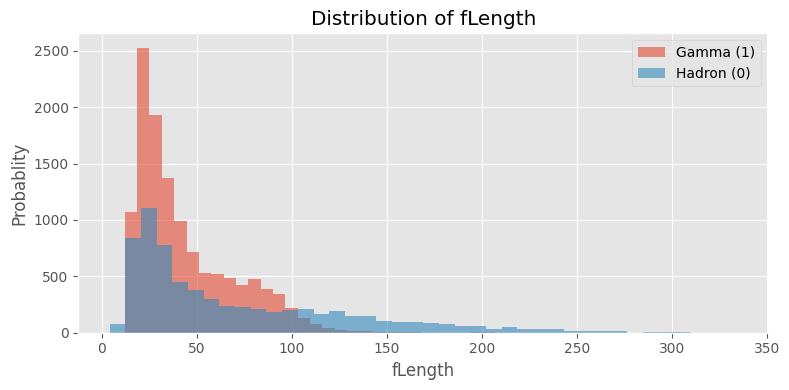

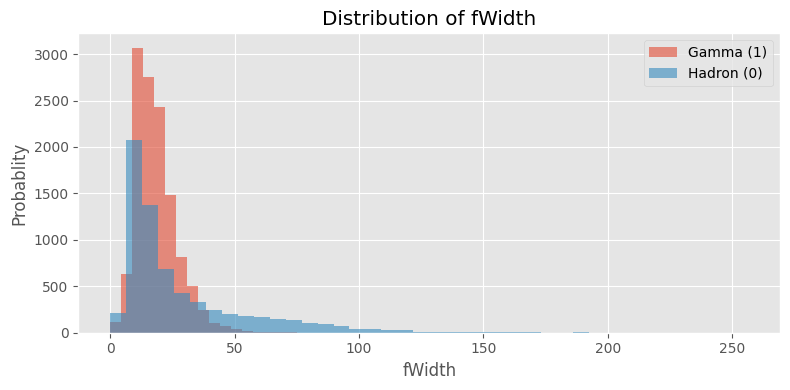

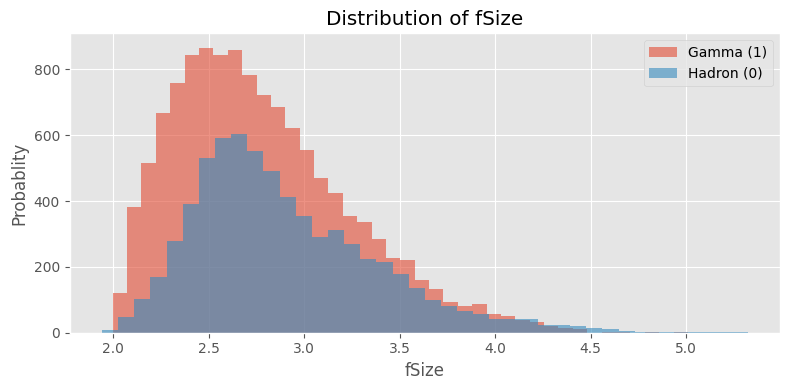

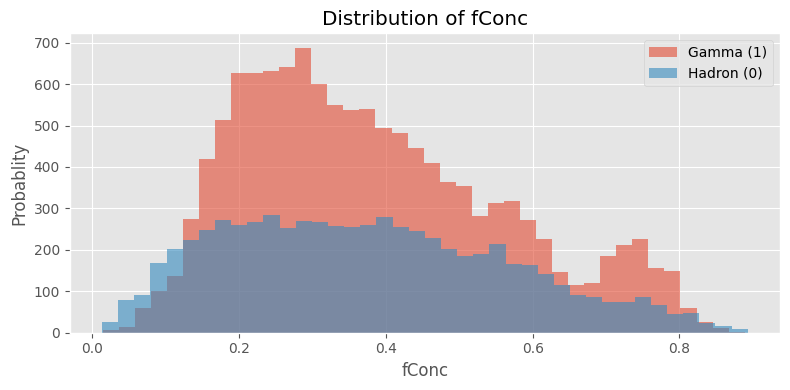

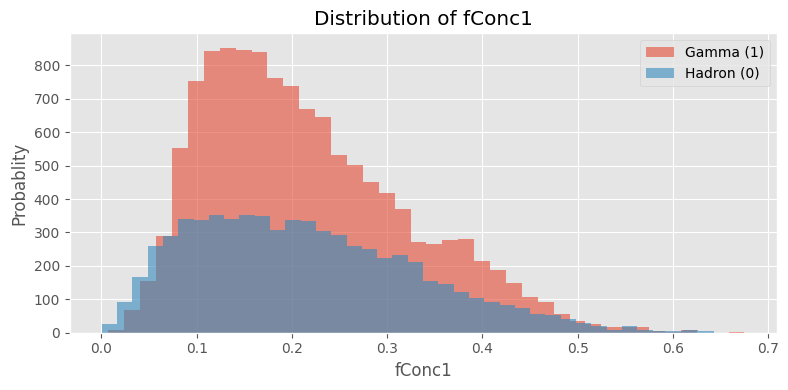

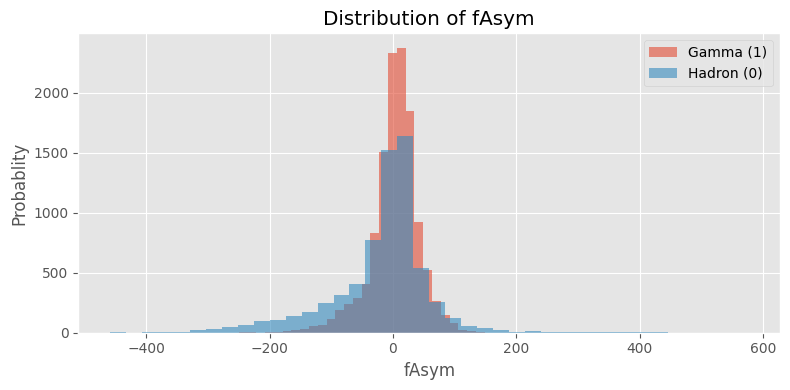

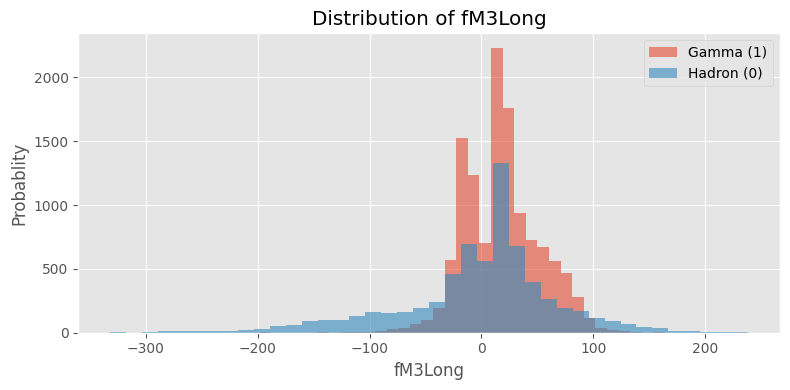

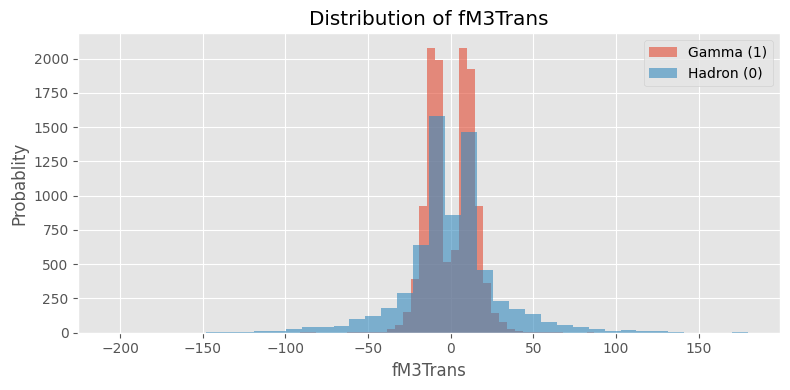

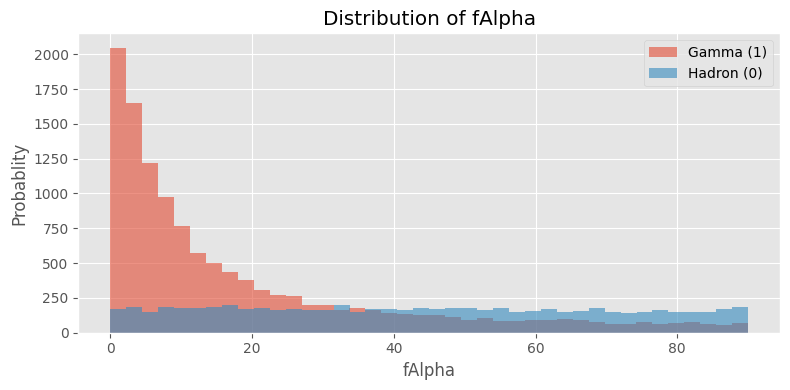

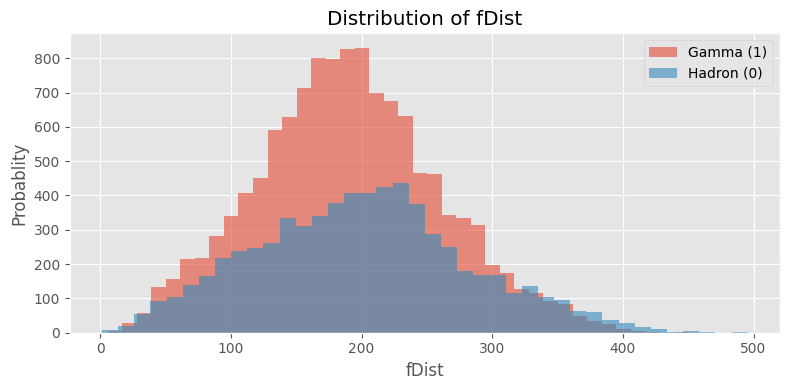

In [ ]:
plt.style.use("ggplot")

for label in cols[:-1]:
    plt.figure(figsize=(8, 4))

    plt.hist(
        df[df['class'] == 1][label],
        bins=40,
        alpha=0.6,
        label='Gamma (1)'
    )

    plt.hist(
        df[df['class'] == 0][label],
        bins=40,
        alpha=0.6,
        label='Hadron (0)'
    )

    plt.title(f"Distribution of {label}")
    plt.xlabel(label)
    plt.ylabel("Probablity")
    plt.legend()
    plt.tight_layout()
    plt.show()


## Creating Train Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split

# all features except the class column
X = df.drop("class", axis=1)

# the target
y = df["class"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scale features to improve model performance and training stability

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[-0.54294179, -0.62738866, -0.64590104, ..., -0.21610391,
         1.47665244, -0.8437807 ],
       [-0.66573322, -0.50919261, -0.80101361, ..., -0.36543949,
        -0.04132548, -0.51586452],
       [-0.69143496, -0.34756347, -0.53141822, ...,  0.2093676 ,
         0.12281918, -0.82694425],
       ...,
       [-0.78674656, -0.55395035, -0.82598398, ...,  0.44953407,
        -0.56584807, -0.00475338],
       [-0.51622806,  0.06047233,  0.22912009, ...,  0.92494013,
         2.00871627, -2.28692347],
       [-0.05655468, -0.6369635 , -0.63764812, ..., -0.64049451,
         1.23156587, -0.47897412]])

###now our features are in array format and target in data frame

we nee to convert into tensors to train a model on this data

In [ ]:
import torch

In [ ]:
# Convert pandas Series -> numpy (if needed)
y_train_np = y_train.to_numpy()
y_test_np  = y_test.to_numpy()

# Convert feature arrays -> tensors (float)
X_train_t = torch.from_numpy(X_train_scaled).type(torch.float)
X_test_t  = torch.from_numpy(X_test_scaled).type(torch.float)

# We will be using BCEWithLogitsLoss so we have to convert the labels into float
y_train_t = torch.from_numpy(y_train_np).type(torch.float)
y_test_t  = torch.from_numpy(y_test_np).type(torch.float)

# Quick shape checks
print("X_train_t:", X_train_t.shape)   # (N_train, n_features)
print("y_train_t:", y_train_t.shape)   # (N_train,)  for CrossEntropyLoss



X_train_t: torch.Size([15216, 10])
y_train_t: torch.Size([15216])


In [ ]:
X_train_t[:5], y_train_t[:5]


(tensor([[-0.5429, -0.6274, -0.6459,  0.2605,  0.5231,  0.0646, -0.4601, -0.2161,
           1.4767, -0.8438],
         [-0.6657, -0.5092, -0.8010,  0.4947,  0.3962,  0.4358, -0.0376, -0.3654,
          -0.0413, -0.5159],
         [-0.6914, -0.3476, -0.5314,  0.1897,  0.2828,  0.4078, -0.3631,  0.2094,
           0.1228, -0.8269],
         [-0.1586,  0.3588,  1.2091, -1.0572, -1.0377,  0.3702,  0.6941,  0.4866,
          -0.5676, -1.1568],
         [-0.9012, -0.4015, -1.2577,  2.0684,  1.4997,  0.4316, -0.2704, -0.4027,
           1.3531,  0.8002]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X_test_t[:5], y_test_t[:5]

(tensor([[-0.1232, -0.6089,  0.2780, -0.1010, -0.2402,  0.0782,  0.4258, -0.1168,
          -0.0233, -0.3881],
         [-0.7042, -1.2183, -1.2410,  1.9453,  1.4637,  0.0213,  0.0461, -0.0059,
          -0.3141,  0.5495],
         [-0.3008, -0.1516,  1.0845, -0.7822, -0.7919,  0.5650,  0.3203, -0.3497,
          -0.6696,  0.0181],
         [-0.8667, -0.7872, -0.5682,  1.1018,  1.1001,  0.1849, -0.4140, -0.1180,
          -0.4992,  0.2677],
         [ 3.5977,  0.8590,  0.9459, -0.8922, -0.8027,  0.8510, -4.3518, -1.4414,
           1.2461,  0.1595]]),
 tensor([0., 1., 1., 0., 0.]))

# Building a model

In [ ]:
import torch
from torch import nn

In [ ]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
class MagicModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=10, out_features=64)
    self.layer2 = nn.Linear(in_features=64, out_features=32)
    self.layer3 = nn.Linear(in_features=32, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = MagicModel().to(device)
model_0

MagicModel(
  (layer1): Linear(in_features=10, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Make predictions with the model
untrained_preds = model_0(X_test_t.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test_t)}, Shape: {y_test_t.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test_t[:10]}")

Length of predictions: 3804, Shape: torch.Size([3804, 1])
Length of test samples: 3804, Shape: torch.Size([3804])

First 10 predictions:
tensor([[ 4.2065e-02],
        [ 2.5651e-02],
        [ 7.8276e-02],
        [ 5.4590e-02],
        [ 2.3909e-01],
        [ 5.8505e-02],
        [ 2.9653e-05],
        [-1.4858e-02],
        [ 5.0159e-02],
        [ 9.8715e-02]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([0., 1., 1., 0., 0., 1., 1., 0., 1., 1.])


###Setup loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

## Setup Accuracy fn

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## Building a training and testing loop

In [ ]:
torch.manual_seed(42)

X_train_t , y_train_t = X_train_t.to(device), y_train_t.to(device)
X_test_t , y_test_t = X_test_t.to(device), y_test_t.to(device)

epochs = 100

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (model outputs raw logits)
  y_logits = model_0(X_train_t).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits,
                 y_train_t)
  acc = accuracy_fn(y_true=y_train_t,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test_t).squeeze(1)
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                         y_test_t)
    test_acc = accuracy_fn(y_true=y_test_t,
                           y_pred=test_preds)
    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.21046, Accuracy: 91.07% | Test loss: 0.40937, Test acc: 86.46%
Epoch: 10 | Loss: 0.20650, Accuracy: 91.32% | Test loss: 0.43472, Test acc: 85.88%
Epoch: 20 | Loss: 0.25721, Accuracy: 88.66% | Test loss: 0.43703, Test acc: 85.46%
Epoch: 30 | Loss: 0.23038, Accuracy: 90.21% | Test loss: 0.39623, Test acc: 86.88%
Epoch: 40 | Loss: 0.21653, Accuracy: 90.86% | Test loss: 0.40096, Test acc: 86.30%
Epoch: 50 | Loss: 0.20568, Accuracy: 91.04% | Test loss: 0.41472, Test acc: 86.20%
Epoch: 60 | Loss: 0.20061, Accuracy: 91.55% | Test loss: 0.42813, Test acc: 86.36%
Epoch: 70 | Loss: 0.23640, Accuracy: 89.43% | Test loss: 0.46129, Test acc: 86.59%
Epoch: 80 | Loss: 0.21980, Accuracy: 90.34% | Test loss: 0.42938, Test acc: 85.91%
Epoch: 90 | Loss: 0.20565, Accuracy: 91.17% | Test loss: 0.43119, Test acc: 86.33%
